# Modelo Autorregressivo (AR)



No primeiro exemplo, vamos criar um sinal autorregressivo e estimar os parâmetros do modelo AR.


In [1]:
pkg load signal

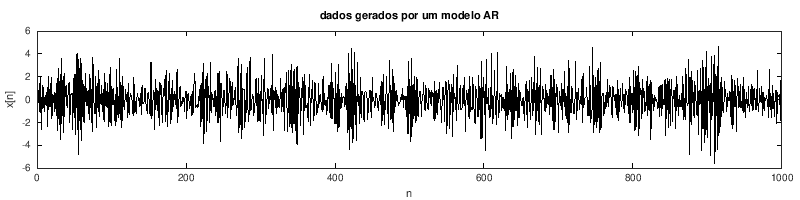

In [2]:
a = [1 0.9 0.6 0.5]; % parâmetros do modelo
n = 1000; % número de amostras
rand('seed',1); % inicializando a semente para gerar o mesmo resultado
x = filter(1,a,randn(n,1));
figure(1, 'position',[0,0,800,200]);
plot(x,'k'); xlabel('n'); ylabel('x[n]'); title('dados gerados por um modelo AR');

Usaremos abaixo a função *periodogram* para mostrar a estimativa da densidade espectral de potência do sinal.

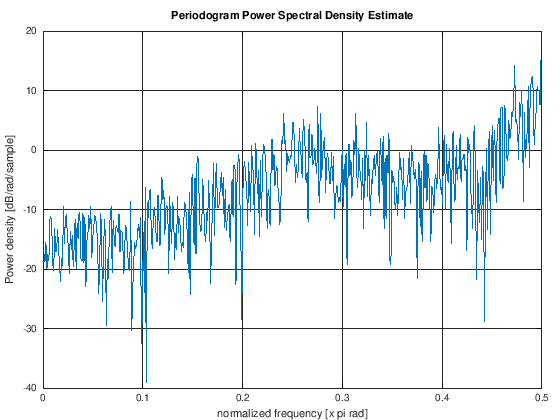

In [3]:
figure; periodogram(x);

Vamos fazer um gráfico comparando a densidade espectral de potência estimada do sinal com aquelas estimadas pelos modelos AR de diferentes ordens.

Para encontrar os coeficientes iremos utilizar a função *aryule* do pacote *signal*. A função retorna os coeficientes estimados e a variância do ruído branco. O valor da variância (teoricamente) é o mesmo que a potência do erro de predição do modelo encontrado.

Abaixo iremos fazer o gráfico da densidade para cada ordem do modelo, mostrar os coeficientes encontrados e o erro.

		coeficientes
ordem 2:	1.00	0.82	0.17	
ordem 3:	1.00	0.91	0.60	0.53	
ordem 4:	1.00	0.89	0.59	0.51	-0.02	
ordem 5:	1.00	0.89	0.61	0.53	0.01	0.03	


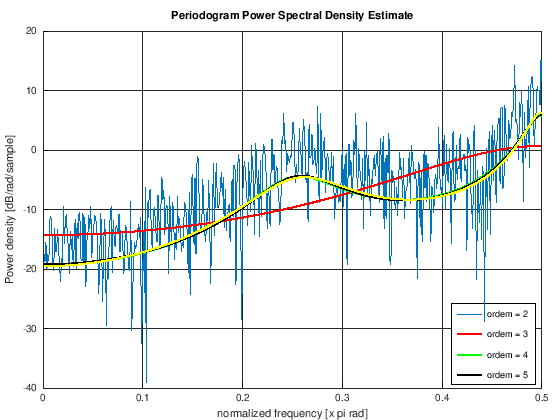

In [4]:
figure; 
hold on;
periodogram(x);
color = {'r','g','k','y'};
order = [2,3,4,5];
lgds = {};
ep = [];
aa = {};
printf('\t\tcoeficientes\n');
for i=1:length(order),
  [aa{i}, ep(i)] = aryule(x, order(i));
  [H, w] = freqz(sqrt(ep(i)), aa{i});
  plot(w/(2*pi),20*log10(2*abs(H)/(2*pi)),color{i},'linewidth',4);
  lgds{i} = sprintf('ordem = %d',order(i));
  printf('ordem %d:\t',order(i));
  for j=1:length(aa{i}), printf('%.2f\t',aa{i}(j)); endfor; printf('\n');
endfor
legend(lgds,'location','southeast');

E agora vamos apresentar a evolução do erro à medida que aumentamos a ordem do modelo.

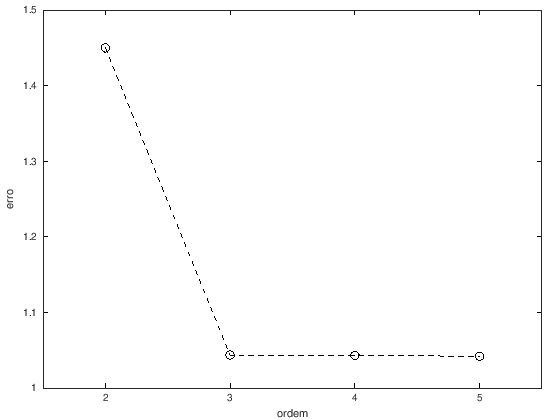

In [5]:
figure; plot(order,ep,'k--o','markersize',8); xlim([order(1)-0.5, order(end)+0.5]);
xlabel('ordem'); ylabel('erro');

Note que para ordem maior que 3, há pouco ganho (em termos de minimização do erro). O modelo criado no início do exemplo era justamente um modelo de ordem 3. Observe também que os coeficientes encontrados são próximos dos coeficientes propostos neste exemplo hipotético. 

### Exemplo - senoidais

Vamos agora revisitar o exemplo proposto por Paul Bourke (http://paulbourke.net/miscellaneous/ar/).

Utilizaremos os dados do arquivo [sine4.dat](http://paulbourke.net/miscellaneous/ar/sine4.dat). 

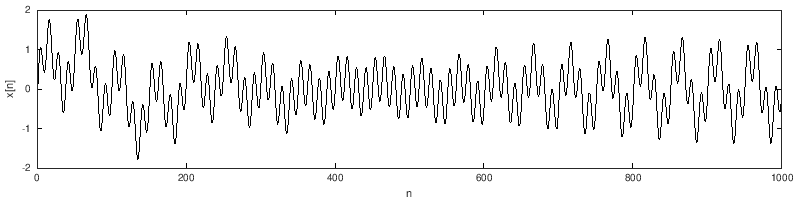

In [6]:
x = load('sine4.dat');
n = [1:length(x)];
figure(1, 'position',[0,0,800,200]);
plot(n,x,'k'); xlabel('n'); ylabel('x[n]');

		coeficientes
ordem 1:	1.00	-0.94	
ordem 2:	1.00	-1.82	0.94	
ordem 3:	1.00	-2.70	2.64	-0.94	
ordem 4:	1.00	-2.52	2.14	-0.43	-0.19	
ordem 5:	1.00	-2.56	2.07	-0.04	-0.64	0.18	
ordem 6:	1.00	-2.50	1.87	-0.05	-0.02	-0.59	0.30	
ordem 7:	1.00	-2.41	1.69	-0.06	-0.03	-0.00	-0.49	0.31	


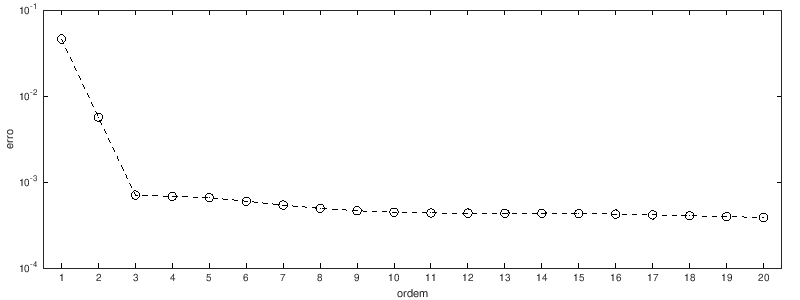

In [7]:
order = [1:20];
lgds = {};
ep = [];
aa = {};
printf('\t\tcoeficientes\n');
for i=1:length(order),
  [aa{i}, ep(i)] = aryule(x, order(i));
  [H, w] = freqz(sqrt(ep(i)), aa{i});
  if(i < 8), % mostrar apenas alguns resultados
    printf('ordem %d:\t',order(i));
    for j=1:length(aa{i}), printf('%.2f\t',aa{i}(j)); endfor; printf('\n');
  endif
endfor
figure(2, 'position',[0,0,800,300]); 
semilogy(order,ep,'k--o','markersize',8); xlim([order(1)-0.5, order(end)+0.5]);
xlabel('ordem'); ylabel('erro'); set(gca,'xtick',order);

### Veja também os exemplos nos links abaixo

https://www.mathworks.com/help/signal/examples/linear-prediction-and-autoregressive-modeling.html

https://www.mathworks.com/help/wavelet/examples/ecg-classification-using-wavelet-features.html